# Puntos de periodo dos del mapeo estándar


Para seguir con el análisis de puntos fijos nos interesa hacer el cálculo de los puntos de periodo dos del mapeo estándar para ello primero necesitamos encontrar alguno de estos puntos.

El mapeo estándar se define como :
$$f_{k}(\theta,p)=\begin{pmatrix}
\theta+p\\
p+k\sin(\theta+p)
\end{pmatrix}$$

Por lo que al aplicar el mapeo dos veces a un punto queda como :

$$f^{2}_{k}(p,\theta)=f_{k}(\theta+p,p+k\sin(\theta+p))=
\begin{pmatrix}
\theta+p+p+k\sin(\theta+p)\\
p+k\sin(\theta+p)+k\sin(\theta+p+p+k\sin(\theta+p))
\end{pmatrix}$$


Por lo que si $(p,\theta)$ es un punto fijo de la ecuación aterior se debe resolver la ecuación $f^{2}_{\theta,p}=(\theta,p)$ es decir 

$$\begin{pmatrix}
2p+k\sin(\theta+p)\\
k\sin(\theta+p)+k\sin(\theta+2p+k\sin(\theta+p))
\end{pmatrix}=\begin{pmatrix}0\\
0
\end{pmatrix}$$

Para poder resolver este sistema y encontrar un punto de periodo dos usaremos el método de newton generalizado.


In [1]:
using TaylorSeries
using PyPlot
using LinearAlgebra

In [2]:
function EstandarMap(θ,p,k,l)
    #x_n = mod([ θ+p, p+k*sin(θ+p) ], 2*pi)
    x_n = mod(θ+p,2*pi)
    y_n = mod(p+k*sin(θ+p),2*pi)
    
    return [x_n,y_n]
    
end

EstandarMap (generic function with 1 method)

In [3]:
function EstandarMap2(θ,p,k,l)
    θ_n = mod(θ+2*p+k*sin(θ+p),2*pi)
    p_n = mod(p + k*sin(θ+p)+k*sin(θ_n),2*pi)
    return [θ_n,p_n]
end

EstandarMap2 (generic function with 1 method)

In [4]:
function EstandarMap2d(θ,p,k,l)
    θ_n = mod(2*p+k*sin(θ+p),2*pi)
    p_n = mod(k*sin(θ+p)+k*sin(θ+2*p+k*sin(θ+p)),2*pi)
    return [θ_n,p]
end

EstandarMap2d (generic function with 1 method)

In [5]:
function EstandarMap3(θ,p,k,l)
    θ_n = θ+2*p+k*sin(θ+p)+p + k*sin(θ+p)+k*sin(θ+2*p+k*sin(θ+p))
    p_n = p + k*sin(θ+p)+k*sin(θ_n)+k*sin(θ_n)
    return [θ_n,p]
end

EstandarMap3 (generic function with 1 method)

In [6]:
function EstandarMap3d(θ,p,k,l)
    θ_n = 2*p+k*sin(θ+p)+p + k*sin(θ+p)+k*sin(θ+2*p+k*sin(θ+p))
    p_n =  k*sin(θ+p)+k*sin(θ_n)+k*sin(θ_n)
    return [θ_n,p]
end

EstandarMap3d (generic function with 1 method)

In [7]:
#=
for a_0 in 0:0.4:2*pi
    for b_0 in 0:0.4:2*pi
        p_0 = [a_0,b_0]
=#
        p_0 = [1.,pi]
        θ,p =set_variables(Float64, "θ p", order=3)
        if (norm(EstandarMap2d(p_0[1],p_0[2],.3,2.)-p_0)>1e-16)
            F = EstandarMap2d(p_0[1],p_0[2],.3,2.)   
            JacobiF = jacobian(EstandarMap2d(θ,p,.3,2.),p_0)
            Δn=inv(JacobiF)*(-F)
            p_0=[Δn[1]+p_0[1],Δn[2]+p_0[2]]
        else 
            show(p_0)
            #break
    
            #=
            Comp1 = EstandarMap2(p_0[1],p_0[2],.3,2.)-p_0
            Comp2 = EstandarMap(p_0[1],p_0[2],.3,2.)-p_0
            if norm(Comp2,Inf) > 0.
                if norm(Comp1,Inf) < 1e-25
                    @show(p_0)
                end
            #=
            else
                @show("mala suerte")
                =#
            end
            =#
            
        end
         @show(p_0)
   #=     
    end
    
    
end
=#





p_0 = [4.03053,0.0]


Para revisar si es de periodo dos hacemos lo siguiente:

In [64]:
EstandarMap2(pi,pi/2.,2*pi,1.)-[pi,pi/2.]

2-element Array{Float64,1}:
 -3.14159
  0.0    

Usaremos el caso del punto de periodo dos $(\pi,\pi)$

In [12]:
"""

PolinomioTaylor1(g,Cθ,CP,TipoVariable)
   
   Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.




Argumentos:





   - g       : grado del polinomio
   - Cθ,CP  :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{Float64}}
   - TipoVariable :  es el tipo : Real, Float64, BigFloat, etc.
   

    Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales. 


"""
function PolinomioTaylor1(g::Real,Cθ,CP,TipoVariable)
    #=
    g es el grado del polinomio, CX y CP son
    arreglos que contienen los coeficientes que forman la variedad.
    
    
    Creamos x,p como variables tipo TaylorN de orden 2
    =#
    
    
    
    θ,p = set_variables(TipoVariable, "θ p", order=2)
    
    #especificamos que LX,LP son de arreglos que guardarán coeficientes del polinomio, sólo son auxiliares en esta función
    
   
    Lθ = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    LP = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    
   #usamos un condicional para separar el caso 1 del resto
    if g == 1
        
        T = [Taylor1([θ], g),Taylor1([p], g)]
    #en el caso en que g>1 entonces usamos las listas que van guardando los coeficientes
    else
        #como CX,CP están guardando los coeficientes pero necesitamos agregar el último término que será una variable 
        
        Lθ = push!(Cθ, θ) 
        LP = push!(CP, p)

        T=[Taylor1(Lθ, g),Taylor1(LP, g)]
        
    end
    return T
end
#Esta función regresa tθ,tp que son Taylor1.TaylorN

PolinomioTaylor1

In [13]:
#=Esta función toma el arreglo que contiene las lambdas que se van calculando, los coeficientes de los polinomios
y el orden de los mismos, lo que hace es generar el lado derecho de la ecuación cohomológica, multiplicando a_n*λ^n
y generando un polinomio de gradno g con estos coeficientes
=#
"""
Vecλ(λ_v,g,Cθ,CP)
Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio.
Regresa un arreglo de tipo TaylorSeries.TaylorN{Float64}


Sus argumentos son:
-g      :  grado del polinomio.
-λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias. 
-Cθ,CP  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.

"""
function Vecλ(λ_v,g,Cθ,CP)
   # el arreglo de λ_v contiene los arreglos que corresponden a la parte derecha de la ecuación cohomológica
    # en θ,p. Es importante hacer la distinción puesto que dependiendo del punto fijo donde se esté calculando
    # el primer valor de λ en θ serpa diferente del primer valor de λ en P
    θλt=Taylor1(λ_v[1].*Cθ,g)
    pλt=Taylor1(λ_v[2].*CP,g)
    
    λvec=[θλt,pλt]
    
    return λvec
end

Vecλ

In [14]:
function ValPropios(M)
    V = BigFloat[]
    
    v_prop1 = (trace(M) + sqrt(trace(M)^2-4.*det(M)))/2.
    v_prop2 = (trace(M) - sqrt(trace(M)^2-4.*det(M)))/2. # dado que hay unos casos en los que esto truena, 
    #debo integrag alguna forma de revisar que no sea el caso que estamos calculando
    push!(V,v_prop1)
    push!(V,v_prop2)
    ValoresP = sort(V,rev=true)
return ValoresP
end
        
    
    
    

ValPropios (generic function with 1 method)

In [15]:
function VecPropios(M,ValoresP)
    Vectores = []
    for i in [1,2]
        y = big.(1.)
        I_2 = big.([1. 0.; 0. 1.])
        M_aux = -I_2.*ValoresP[i]+M
        x = -(y*M_aux[3])/M_aux[1]
        push!(Vectores,x)
        push!(Vectores,y)
    end
    return Vectores
end

VecPropios (generic function with 1 method)

In [16]:
function EigenValores(M)
    ValoresP  = ValPropios(M)
    VectoresP = VecPropios(M,ValoresP)
    V = (ValoresP,[VectoresP[1] VectoresP[3];VectoresP[2] VectoresP[4]])
    return V
end

EigenValores (generic function with 1 method)

In [17]:
function Orden1(Cθ,CP,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayθ,λarrayP)
            #usamos la función PolinomioTaylor para crear el polinomio tipo Taylor1.TaylorN{T}
            t = PolinomioTaylor1(1,Cθ,CP,TipoVariable)
            @show(typeof(t))
            #Aplicamos el mapeo a los polinomios que resultan de la función anterior.
            Or1 = Mapeo(t[1],t[2],k,l)
            @show(typeof(Or1))
            AuxOr1=[Or1[1][1],Or1[2][1]]
            @show(typeof(AuxOr1))
            #Calculamos el jacobiano del Orden 1 para obtener sus valores y vectores propios.
            JPO = jacobian(AuxOr1,[PuntoFijo[1],PuntoFijo[2]])
            @show(typeof(JPO))
            @show(det(JPO))
            
            
            #Calculamos los valores y vectores propios
            if TipoVariable == BigFloat
                eigval,eigvec = EigenValores(JPO)
            else
                eigval,eigvec = eig(JPO)
            end
            #escogemos el tipo de variedad que queremos calcular. Como se ordenan de menor a mayor la inestable es la segunda
            λ = eigval[tipo_v]
            
            #Ponemos los coeficientes en una variable nueva cada uno y los agregamos a las listas CX,CP,λ
            Coefθ,CoefP = eigvec[:,tipo_v]
            @show(typeof(Coefθ))
            #@show(Coefθ,CoefP)
            push!(Cθ, Coefθ)
            push!(CP, CoefP)
            push!(λarrayθ, λ)
            push!(λarrayP, λ)
            λ_v=[λarrayθ,λarrayP]
            
            #@show(λarray)  
            @show(typeof(Cθ))
            @show(typeof(λarrayθ))
    return Cθ, CP,λarrayθ,λarrayP, λ_v
end
            
    

Orden1 (generic function with 1 method)

In [18]:
#Creamos una función que reciba el orden del polinomio , el punto fijo, el parámetro k y 
#el tipo de varidad que queremos(estable=1, inestable=2)
"""
Variedades(Mapeo,orden, PuntoFijo,k,tipo_v,TipoVariable)
Es una función que calcula las variedades de cierto mapeo. Usa las funciones de PolinomioTaylor1 y Vecλ para calcular los
polinomios de cada lado de la ecuación cohomológica y les aplica el mapeo dado. 



Argumentos:


- Mapeo : Mapeo de dos dimensiones, debe recibir al menos dos parámetros que son los polinomios antes calculados.
- orden : se trata del orden del polinomio.
- PuntoFijo : ES el punto fijo donde queremos calcular la variedad.
- k     : Es la constante del mapeo.
- tipo_v : 1 si la variedad es estable, 2 si es inestable.
- TipoVariable :  Float64,BigFloat, Integer,etc.


"""
function Variedades(Mapeo,orden, PuntoFijo,k,l,tipo_v, TipoVariable)
   
    #definimos unas listas donde se guardarán los coeficientes  de todo el polinomio, tales deben ser
    # de tipo "Array{TaylorSeries.TaylorN{Int64},1}" dado que los términos que se van agregando 
    # en cada orden son de tipo TaylorN.
    
    a=TipoVariable(PuntoFijo[1])
    b=TipoVariable(PuntoFijo[2])
    Cθ = [a+TaylorN(0.)]
    CP = [b+TaylorN(0.)]
    
    
    #λarray es la lista que contiene a los coeficientes del polinomio de λ
    λarrayθ = [a^0]
    λarrayP = [b^0]
    
    #definimos un vector que contiene el punto en el que se evalúa el jacobiano que se calcula después
    #dado que sólo lo usamos para obtener los valores que resultaron en el mapeo evaluamos siempre en [1.,1.]
    
    
    
    
    Cθ,CP,λarayθ, λarrayP,λ_v = Orden1(Cθ,CP,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayθ,λarrayP)
    


    for g in 2:orden
        
            #Creamos los polinomios con las listas correspondientes 
            t = PolinomioTaylor1(g,Cθ,CP,TipoVariable)
            
            # aplicamos el mapeo estándar y al resultado le llamamos OrG por Orden g.
            OrG = Mapeo(t[1],t[2],k,l)
            
            push!(λarrayθ,λarrayθ[2]^g)
            push!(λarrayP,λarrayP[2]^g)
            λ_v=[λarrayθ,λarrayP]
            
            #agregamos el término correspondiente a λ 
            λ_vec=Vecλ(λ_v,g,Cθ,CP)
            
            
            #@show(λvec)
            
            # ahora ya tengo las dos partes de la ecuación y debo igualarlas para resolver.
            EcuaCohomo=OrG-λ_vec
            
            
            # de esta ecuación necesitamos solo los de orden g, así que los extraemos manualmente 
            θ_g=EcuaCohomo[1].coeffs[g+1]
            p_g=EcuaCohomo[2].coeffs[g+1]
            vec_orden_g=[θ_g,p_g]
            
            
            #calculamos el término independiene en la ecuación
            θ_ind=EcuaCohomo[1].coeffs[g+1].coeffs[1].coeffs[1]
            p_ind=EcuaCohomo[2].coeffs[g+1].coeffs[1].coeffs[1]
            vec_ind=[-θ_ind,-p_ind]
            
            #calculamos el jacobiano
            JacOrdenG = jacobian(vec_orden_g)
            
            
            
            
            #Con esta información podemos evaluar lo siguiente:
            # Si el vector de términos independientes es cero y el determinante del jacobiano es distinto de cero
            # entonces la solución a la ecuación cohomológica es la trivial
            if norm(vec_ind)==0.
                if det(JacOrdenG)!=0.
                    
                    Cθ[g+1]=0.
                    CP[g+1]=0.
                end
            else
                # Si el vector de términos independientes es distinto de ceroentonces necesitamos 
                #resolver la ecuación JacOrdenG[x_g,p_g]*[x,p]**=vec_ind[x_g,p_g]
                # entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
                TermG=JacOrdenG \ vec_ind
                
                Cθ[g+1]=TermG[1]
                CP[g+1]=TermG[2]
            
            end
            

    end
    return Cθ,CP,λarrayθ, λarrayP
end

Variedades

In [19]:
"""
PolinomioCohomo(Mapeo,Pol_vec,λvec, k)
Esta función calcula la ecuación cohomológica con los polinomios que ya se calcularon. Regresa un arreglo de dos 
elementos que son los valores de x,θ del mapeo.


Argumentos:
-Mapeo : función o mapeo del cual calculamos las variedades.Debe ser una función que reciba tres parámetros
 que son dos de sus variables y la constante del mapeo. Como salida debe tener un arreglo de dos elementos. 
-Pol_vec : Es un arreglo de dos elementos que son los polinomios calculados con anterioridad. 
-k     : es el valor de la constante del mapeo 
-λvec : 

"""
function PolinomioCohomo(Mapeo,Pol_vec,λvec, k,l ,PuntoFijo,modulo)
    Map_vec=Mapeo(Pol_vec[1],Pol_vec[2],k,l)
    if modulo==2*pi
        Ec_Cohomo = mod(Map_vec-λvec,modulo)
    else
        Ec_Cohomo = Map_vec-λvec
    end
    return Ec_Cohomo
end

PolinomioCohomo

In [20]:
"""
EvaluarPol(Ec_2var,Tiempo,paso)

Es una función que toma un arreglo de dos dimensiones que contiene polinomios y los evalúa en el tiempo dado en los pasos deseados




Argumentos:

-Ec_2var : Arreglo de dos dimensiones que contiene polinomios en cada una de ellas. 
-Tiempo  : Valor hasta el cual se quiere evaluar cada polinomio
-paso    : es el paso que se considera en cada evaluación del polinomio. 

"""
function EvaluarPol(Ec_2var,Tiempo,paso,TipoVariable)
    
    
    
    
    
    Val=TipoVariable[]
    Tiem=TipoVariable[]
    
    
    for t = 0:paso:Tiempo
        x = evaluate(Ec_2var[1], t)
        y = evaluate(Ec_2var[2], t)

        
        norma = norm([x,y],Inf)
        push!(Val,norma)
        push!(Tiem,t)
    
    end
    return Tiem,Val
end

EvaluarPol

In [21]:
"""
CreaPol es una función que dadas dos listas y un grado crea  un arreglo de dos entradas , en cada una de ellas se encuentra 
el polinomio de grado g con los coeficientes de las listas. 


Argumentos:


- A,B : arreglos que contienen lo que serán los coeficientes del polinomio.
- orden : grado del polinomio
"""
function CreaPol(A,B,orden)
    Taylor = [Taylor1(A,orden),Taylor1(B,orden)]
    return Taylor
end

CreaPol

In [22]:
function MetParametrización(Mapeo,modulo,orden,PuntoFijo,k,l,tipo_v,Tiempo,paso, TipoVariable)
    Coeficienteθ,CoeficienteP,λarrayθ,λarrayP = Variedades(Mapeo,orden,PuntoFijo,k,l,tipo_v,TipoVariable)
        
    
    θ = TipoVariable[]
    P = TipoVariable[]
    
    for i in 1:orden+1
            
        push!(θ,Coeficienteθ[i].coeffs[1].coeffs[1])
        push!(P,CoeficienteP[i].coeffs[1].coeffs[1])
        
    end
    
    Taylor=CreaPol(θ,P,orden)
    
    λ_vec=CreaPol(θ.*λarrayθ,P.*λarrayP,orden)
    
    
    
    Ecua_Cohomo = PolinomioCohomo(Mapeo,Taylor,λ_vec, k,l,PuntoFijo,modulo)
    Valor_t , Error = EvaluarPol(Ecua_Cohomo,Tiempo,paso, TipoVariable)
    ErrorV = [Valor_t,Error]
    
    
    return Taylor,ErrorV,λ_vec
   
end

MetParametrización (generic function with 1 method)

Primero veremos que pasa cuando se usa Float 64 en un polinomio de 5° grado 

In [23]:
using PyPlot

In [68]:
#Usando Float64
Polinomio,E,ValProp = MetParametrización(EstandarMap,2*pi, 25, [pi,0], 0.5, 0.0, 2, 2.9, 0.125, Float64)

typeof(t) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(Or1) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(AuxOr1) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(JPO) = Array{Float64,2}
det(JPO) = 1.0
typeof(Coefθ) = Float64
typeof(Cθ) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(λarrayθ) = Array{Float64,1}


(TaylorSeries.Taylor1{Float64}[ 3.141592653589793 - 0.7071067811865475 t - 5.5665763597606956e-18 t² - 0.00444721246029275 t³ - 1.7204442821081315e-20 t⁴ + 5.9174781969094955e-6 t⁵ + 3.7040090099117074e-22 t⁶ + 9.198900801860366e-8 t⁷ + 6.621708130745122e-25 t⁸ - 1.0018194877523858e-10 t⁹ - 9.695173291223945e-27 t¹⁰ - 1.4009297677014822e-12 t¹¹ - 2.0368094301189887e-29 t¹² + 2.6929435062533664e-16 t¹³ + 1.31141358376312e-31 t¹⁴ + 1.4417906940842044e-17 t¹⁵ + 3.678732827285074e-34 t¹⁶ + 8.533463563191804e-21 t¹⁷ - 1.080809772383085e-36 t¹⁸ - 1.0661421337440847e-22 t¹⁹ - 4.3159183023491484e-39 t²⁰ - 1.4009658909305037e-25 t²¹ + 5.437274545306172e-42 t²² + 5.898984897769375e-28 t²³ + 3.656780256304734e-44 t²⁴ + 1.2639287573389655e-30 t²⁵ + 𝒪(t²⁶), - 0.7071067811865476 t - 1.6699729079282087e-17 t² - 0.031130487222049252 t³ - 2.5806664231621974e-19 t⁴ + 0.00018344182410419437 t⁵ + 2.3335256762443757e-20 t⁶ + 1.1682604018362664e-5 t⁷ + 1.688535573340006e-22 t⁸ - 5.1192975824146914e-8 t⁹ - 9

Calculamos el mismo polinomio pero ahora usando BigFloat para ver la diferencia sobre todo en el error. 

In [69]:
#Usando BigFloat
PolinomioB,EBig,ValPropB = MetParametrización(EstandarMap,2*pi,25,[pi,0.],0.5,0.0,2,2.9,0.125,BigFloat)

typeof(t) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{BigFloat}},1}
typeof(Or1) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{BigFloat}},1}
typeof(AuxOr1) = Array{TaylorSeries.TaylorN{BigFloat},1}
typeof(JPO) = Array{BigFloat,2}
det(JPO) = 1.000000000000000000000000000000000000000000000000000000000000000000000000000000
typeof(Coefθ) = BigFloat
typeof(Cθ) = Array{TaylorSeries.TaylorN{BigFloat},1}
typeof(λarrayθ) = Array{BigFloat,1}


(TaylorSeries.Taylor1{BigFloat}[ 3.141592653589793115997963468544185161590576171875000000000000000000000000000000 - 2.000000000000000000000000000000000000000000000000000000000000000000000000000000 t - 4.453261087808557008094785208272726061049178903152869002254036734278340579843946e-17 t² - 1.006289308176100628930817610062894337263979789638816192180006792956809973592463e-01 t³ - 1.10108434054920458320911902469235360759149190172986532785631784100459850321986e-18 t⁴ + 1.071177973902911621379785378163222709241107622784717557359579668373790275284699e-03 t⁵ + 1.896452613074795596335255981632925061024756883729117418647521956586578754627939e-19 t⁶ + 1.332143131946565860188963707722597552263796500615611915141943126849368288311383e-04 t⁷ + 2.712251650353205357595752650507034080245730132413912404229229821824676426974628e-21 t⁸ - 1.160631670070550831659436788661719148895716689153330036275614951787285687848621e-06 t⁹ - 3.176914384068265048388464923307040962952838898232729244646780055258365194814583

Graficaremos el error cometido que es el que nos dirá cuanta diferencia hay entre tipos de números. 

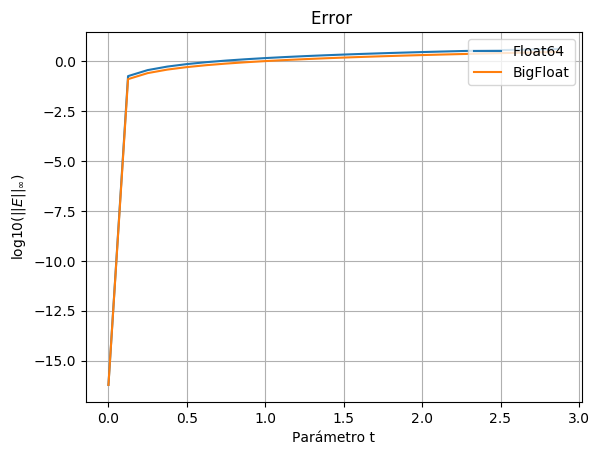

PyObject <matplotlib.legend.Legend object at 0x7f4e2eceff90>

In [70]:
plot(E[1],log10(E[2]),marker= "None", label="Float64")
plot(EBig[1],log10(EBig[2]),marker= "None", label="BigFloat")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Para observar cómo va la variedad graficaremos el espacio fase

In [27]:
function iterarMap(f,x_i,p_i,n, k,l)   #Definimos una función para iterar el mapeo
    
    x = x_i                      #    
                                     #Damos condiciones iniciales
    y = p_i                          #

    iteradosMX = [x_i]

    iteradosMY = [p_i]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente            

        F = f(x_i,p_i, k,l)
        
        push!(iteradosMX,F[1])
        
        push!(iteradosMY,F[2])
            

        x_i = F[1]

        p_i = F[2]
    end

    return iteradosMX, iteradosMY  #La funcion iterados regresa las listas que corresponden a la trayectoria del 
end

iterarMap (generic function with 1 method)

In [28]:
#esta función llama la función que itera el mapeo para crear su gráfica.
function graficarMap(k,l)
    n = 100
    s=2pi/18

    for p_i=0:s:2pi
        for x_i =0:s:2pi
            t,p = iterarMap(EstandarMap,x_i,p_i,n, k,l)
            #p = scatter(p,t,marker=".",s=0.1)
            p = scatter(t,p,marker=".",s=0.1)
        end
    end
    
end

graficarMap (generic function with 1 method)

In [36]:
#esta es una función para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del parámetro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
function evaluar(Tiempo, paso,A,B)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = 0:paso:Tiempo
        #=
        x = mod2pi(evaluate(A,t)-2*pi)
        y = mod2pi(evaluate(B,t)-2*pi)
        =#
        x = mod(evaluate(A,t),2*pi)
        y = mod(evaluate(B,t),2*pi)
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,color="red",linestyle="-")
    
end

evaluar (generic function with 1 method)

In [37]:
function Graficar(Tiempo, paso, k,l,A,B)
    graficarMap(k,l)
    evaluar(Tiempo,paso,A,B)
end

Graficar (generic function with 1 method)

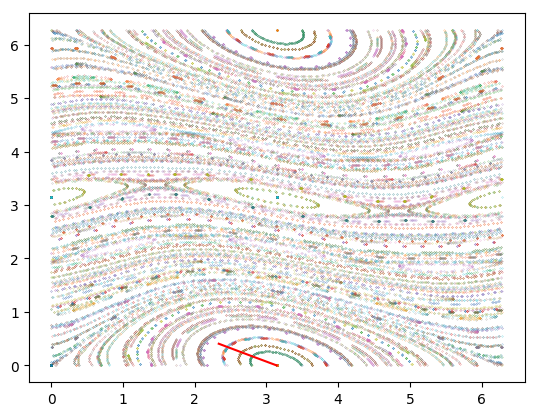

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4e2ddc98d0>

In [71]:
Graficar(.4,0.025,0.5,0.,PolinomioB[1],PolinomioB[2])

- ponerlo como un modulo competo de julia
- usar git para subirlo
- escribir de manra clara el error ("error de dominio") sería una opción porque el error viene de que que el método esta diseñado para los puntos fijos hiperbólicos mientras que si en el análisis los valores propios tienen parte real igual a cero estamos en el caso de elípticos por lo que no funciona si hay compleos. Explicar que el usuario introdujo un punto fijo no válido .
- pedir al usuario que introduzca la función para calcular el error 
